<font color='red'> 

# WARNING : Open any VPN and select U.S., France or any western nation before you start working if quandl doesnt seem to be working in India
</font>

# Regression is to take continuous data, find the equation that best fits the data, and be able forecast out a specific value. With simple linear regression, you are just simply doing this by creating a best fit line

<font color='green'> 
    
### Regression is a form of supervised machine learning, which is where the scientist teaches the machine by showing it features and then showing it what the correct answer is, over and over, to teach the machine. Once the machine is taught, the scientist will usually "test" the machine on some unseen data, where the scientist still knows what the correct answer is, but the machine doesn't. The machine's answers are compared to the known answers, and the machine's accuracy can be measured. If the accuracy is high enough, the scientist may consider actually employing the algorithm in the real world.
</font>

<font color='green'> 
    
    
### Since regression is so popularly used with stock prices, we can start there with an example. To begin, we need data. Sometimes the data is easy to acquire, and sometimes you have to go out and scrape it together, like what we did in an older tutorial series using machine learning with stock fundamentals for investing. In our case, we're able to at least start with simple stock price and volume information from Quandl. To begin, we'll start with data that grabs the stock price for Alphabet (previously Google), with the ticker of GOOGL:
</font>

In [1]:
import pandas as pd
import quandl
df = quandl.get("WIKI/GOOGL")
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

## we have quite a few columns, many are redundant, a couple don't really change. We can most likely agree that having both the regular columns and adjusted columns is redundant. Adjusted columns are the most ideal ones

In [2]:
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [3]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.441017    0.324968   44659000.0
2004-08-20   54.322689  8.537313    7.227007   22834300.0
2004-08-23   54.869377  4.062357   -1.227880   18256100.0
2004-08-24   52.597363  7.753210   -5.726357   15247300.0
2004-08-25   53.164113  3.966115    1.183658    9188600.0


## We manage to have only 4 colums that is adjusted close, high low pecentage, percentage change and adjusted volume, and it is only the adjusted close that we are gonna work upon and predict the future prices of

In [4]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
import numpy as np

forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))

## We create another temporary variable forecast_col so that we make its value is equal to adj close and we can also change it without affecting the original adj close. 
## We also fill the na in the original dataset with -99999 because scikit learn isnt very comfortable with na datas so hence if we have any na's in the data we create outliers by providing it with such vast value
## The forecast out is used for having 1 % of the data values (math.ceil converts it into a whole number and we convert it into a int as math.ceil gives a float which we do not want 

In [5]:
print(forecast_out)

35


In [6]:
df['label'] = df[forecast_col].shift(-forecast_out)
df['label'].isna().sum()

35

In [7]:
df.tail(36)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2018-02-05,1068.76,5.512236,-2.893850,3742469.0,1006.94
2018-02-06,1084.43,5.569849,4.879205,3732527.0,NaN
2018-02-07,1055.41,3.025734,-2.724499,2544683.0,NaN
2018-02-08,1005.60,5.851043,-5.120439,3067173.0,NaN
2018-02-09,1043.43,5.488465,1.710726,4436032.0,NaN
2018-02-12,1054.56,1.920631,-0.199684,2796258.0,NaN
2018-02-13,1054.14,1.365911,0.394286,1574121.0,NaN
2018-02-14,1072.70,2.445228,1.743304,2029979.0,NaN
2018-02-15,1091.36,2.517733,0.730075,1806206.0,NaN


In [8]:
df.dropna(inplace=True)

## Here we create another column in the dataset with values from forecast_col and shift it that is if we shift it by -35 then the first 35 colums would be removed and the remaining data would shift upwards creating na's in the tail, which is why we drop na again

In [9]:
X = np.array(df.drop(columns=['label']))
y = np.array(df['label'])
X = preprocessing.scale(X)

# Above, what we've done, is defined X (features), as our entire dataframe EXCEPT for the label column, converted to a numpy array. We do this using the .drop method that can be applied to dataframes, which returns a new dataframe. Next, we define our y variable, which is our label, as simply the label column of the dataframe, converted to a numpy array

# We could leave it at this, and move on to training and testing, but we're going to do some pre-processing. Generally, you want your features in machine learning to be in a range of -1 to 1. This may do nothing, but it usually speeds up processing and can also help with accuracy. Because this range is so popularly used, it is included in the preprocessing module of Scikit-Learn. To utilize this, you can apply preprocessing.scale to your X variable

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## What train_test_split does is that Split arrays or matrices into random train and test subsets. So in x there will be a subset which we will be using for training and a subset which we will be using for testing, this goes similar for y

## The test size :- If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples

## The return here is the training set of features, testing set of features, training set of labels, and testing set of labels. Now, we're ready to define our classifier. There are many classifiers in general available through Scikit-Learn, and even a few specifically for regression, but for now, let's use Linear Regression

In [11]:
clf = LinearRegression()
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.9757921923377557


## Here .fit trains our data and .score tests it, giving us the accuracy of our prediction model

In [12]:
clf = LinearRegression(n_jobs=-2)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.9757921923377557


## Another thing to note is that some of the algorithms must run linearly, others not. Do not confuse linear regression with the requirement to run linearly, by the way. So what does that all mean? Some of the machine learning algorithms here will process one step at a time, with no threading, others can thread and use all the CPU cores you have available.

## Heading to the docs for sklearn.svm.SVR, and looking through the parameters, do you see n_jobs? Not me. So no, no threading here. As you could see, on our small data, it makes very little difference, but, on say even as little as 20mb of data, it makes a massive difference. Next up, let's check out the LinearRegression algorithm. Do you see n_jobs here? Indeed! So here, you can specify exactly how many threads you'll want. If you put in -1 for the value, then the algorithm will use all available threads

## In short it does not make much of a difference here as our data is small, but in large amounts of data multi threading would save a lot of data

In [13]:
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k,confidence)

linear 0.9747835363831144
poly 0.6190865255232896
rbf 0.8217872472607866
sigmoid 0.9012739183629387


# Now, let's use Support Vector Regression from Scikit-Learn's svm package

<font color='green'> 

### There is a parameter to svm.SVR for example which is kernel. What in the heck is that? Think of a kernel like a transformation against your data. It's a way to grossly, and I mean grossly, simplify your data. This makes processing go much faster. In the case of svm.SVR, the default is rbf, which is a type of kernel
</font>

<font color='green'> 

### As we can see, the linear kernel performed the best, closely by rbf, then poly, then sigmoid was clearly just goofing off and definitely needs to be kicked from the team
</font>

In [1]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(columns=['label']))
X = preprocessing.scale(X)
X = X[:-forecast_out]
df.dropna(inplace=True)
y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.9764023529412007


## Code until now
## Note that first we take all data, preprocess it, and then we split it up. Our X_lately variable contains the most recent features, which we're going to predict against. As you should see so far, defining a classifier, training, and testing was all extremely simple. Predicting is also super easy:

In [1]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import pickle

style.use('ggplot')

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.1 * len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(columns=['label']))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:] #Let forecast_out be 20, so if total elements are 100, -forecast_out would be 80 and hence this tells
                             #us to start from 80 to the end
X = X[:-forecast_out]  #This will be 0 to 80(if assumptions from previous comments are taken)

df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



## Important : We write X_lately before X = X[:-forecast_out] becacause if we write it after X will have only data from 0 to 80(if we take the assumptions from the comments) and the the X_lately will have the data from 60 to 80 as the data has changed(socho)

## While our machine learning classifier takes a few seconds to train, there may be cases where it takes hours or even days to train a classifier. Imagine needing to do that every day you wanted to forecast prices, or whatever. This is not necessary, as we can just save the classifier using the Pickle module


In [2]:
import pickle

clf = svm.SVR(kernel='linear')
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

with open('linearregression.pickle','wb') as f:
    pickle.dump(clf, f)

## With pickle, you can save any Python object, like our classifier. After defining, training, and testing your classifier.Now, run the script again, and boom, you should have linearregression.pickle which is the serialized data for the classifier. Now, all you need to do to use the classifier is load in the pickle, save it to clf, and use just like normal

In [ ]:
%matplotlib notebook
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)

forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for n in range(len(df.columns)-1)]+[i]
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## forecast_set is gonna predict the dates in X_lately

<IPython.core.display.Javascript object>


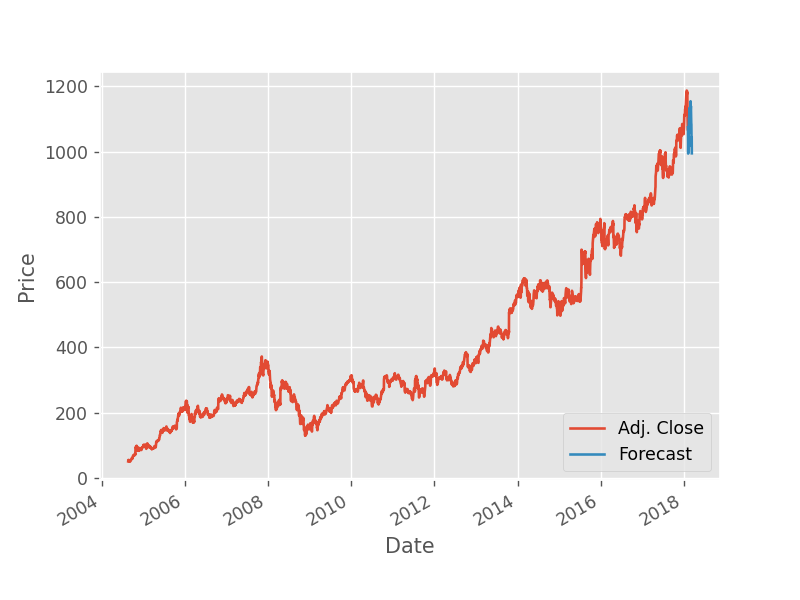

[[ 2.62040424  2.26641124  3.25839716 -0.49545744]
 [ 2.50780834  0.64357973 -1.79354019 -0.6394908 ]
 [ 2.31454846  2.66581649 -3.38541422 -0.57613569]
 [ 2.46132664  2.2334127   1.15324503 -0.41015315]
 [ 2.50451039 -0.1577593  -0.11604074 -0.60898579]
 [ 2.50288082 -0.54974983  0.27859553 -0.75717739]
 [ 2.57489253  0.19225109  1.17488957 -0.70190181]
 [ 2.64729224  0.24167535  0.50169569 -0.72903566]
 [ 2.66335519 -0.42565789  0.14545442 -0.70894085]
 [ 2.69474392  0.18451827  0.67510086 -0.74841251]
 [ 2.73416412  0.32322713  0.2951878  -0.70256205]
 [ 2.71922635 -0.2108907  -0.53369123 -0.77997427]
 [ 2.78980248 -0.2161489   0.57670541 -0.79835378]
 [ 2.85036837 -0.59074485  0.71164132 -0.76748452]
 [ 2.7487527   0.23822692 -1.50481437 -0.69403423]
 [ 2.6960243   0.07765452 -1.05399713 -0.65327277]
 [ 2.5698874   1.41774617 -2.26663627 -0.61255097]
 [ 2.61927906  0.90780192  1.65946178 -0.64392126]
 [ 2.66048404  0.36960217  1.04146504 -0.77436569]
 [ 2.68430688 -0.79713698 -0.05

In [1]:
%matplotlib notebook
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import pickle

style.use('ggplot')

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(columns=['label']))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:] #Let forecast_out be 20, so if total elements are 100, -forecast_out would be 80 and hence this tells
                             #us to start from 80 to the end
X = X[:-forecast_out]  #This will be 0 to 80(if assumptions from previous comments are taken)

df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = svm.SVR(kernel='linear')
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

with open('linearregression.pickle','wb') as f:
    pickle.dump(clf, f)

pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)

forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for n in range(len(df.columns)-1)]+[i]
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
print(X_lately)
print(3*"\n")
print(100*"#")
print(3*"\n")
print(forecast_set)
print(3*"\n")
print(100*"#")
print(3*"\n")
print(confidence)
print(1*"\n")
print(100*"#")
print(1*"\n")
print(forecast_out)

## clf.predict only works with 2d data as you can see with me printing X_lately which we are going to predict, if its like [2.0  3.0  5.0  1.0], then it would give an error, we would have to make it into [[2.0  3.0  5.0  1.0]]

## We can see that we did not need to train the whole section again but instead we just took the pickle which is why we commented out the section in the code

## Here what we did is that first we set another label forecast which we set NaN for all its values(because it will be filled later on)

## Then last_date = df.iloc[-1].name gets into the -1 row or the last row of the data and takes its name (which in this case would be its date as the date is the index(.name usually gives the value of the index of the particular row chosen))

## Then we would convert it into unix date and add 86400 (1 day) to it 

## We create a loop where the new date is then converted back into the date format from unix.The code df.loc[next_date] = [np.nan for n in range(len(df.columns)-1)]+[i] means that for the location of next_date(this would be the day after the last date in the original dataset so a new row would be created) in which for every column except the last one Nan's would be filled([np.nan for n in range(len(df.columns)-1)]) and then the last column would be i which in this case would be the data from the forecast_set

## This would go on till the last date in the forecast_set and then we will plot the graph

## We can further understand what we did with the loop by looking down below

In [5]:
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2018-03-08 05:30:00,NaN,NaN,NaN,NaN,NaN,1086.499136
2018-03-09 05:30:00,NaN,NaN,NaN,NaN,NaN,1044.300890
2018-03-10 05:30:00,NaN,NaN,NaN,NaN,NaN,1018.610734
2018-03-11 05:30:00,NaN,NaN,NaN,NaN,NaN,1045.450396
2018-03-12 05:30:00,NaN,NaN,NaN,NaN,NaN,996.709397
